In [3]:
##-- Bridges Data (Predicts Lane) --##
import pandas as pd
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
import sklearn.model_selection as cv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn import svm


data = pd.read_csv('bridges.data', sep=",", header=None)
data.columns = ["IDENTIF","RIVER","LOCATION","ERECTED","PURPOSE","LENGTH","LANES","CLEAR-G","T-OR-D","MATERIAL","SPAN","REL-L","TYPE"]
data = data.replace(' ','', regex=True)
data_cat = data.iloc[:,[1,3,4,5,7,8,9,10,11,12]]
data_cont = data.iloc[:,[2,6]]
data_dummies = pd.get_dummies(data_cat)
data_dummies = data_dummies.drop(["RIVER_Y","TYPE_?","TYPE_NIL","REL-L_?"],axis = 1)
data_cont = data_cont.replace('?', 0)


d_s=StandardScaler()
d_n=d_s.fit_transform(data_cont)

X_and_Y = np.hstack([d_n, data_dummies.values])

np.random.shuffle(X_and_Y)
X = X_and_Y[:5000, 0:-1]
Y = X_and_Y[:5000, -1]

split20 = int(round(len(X)*0.2))
split50 = int(round(len(X)*0.5))
split80 = int(round(len(X)*0.8))

xTrain = X[:split20,:] # Get features from train + val set.
xTest  = X[split20:len(X),:] # Get features from test set.     
yTrain = Y[:split20] # Get labels from train + val set.
yTest  = Y[split20:len(X)] # 

xTrain50 = X[:split50,:] # Get features from train + val set.
xTest50  = X[split50:len(X),:] # Get features from test set.     
yTrain50 = Y[:split50] # Get labels from train + val set.
yTest50  = Y[split50:len(X)] # 

xTrain80 = X[:split80,:] # Get features from train + val set.
xTest80  = X[split80:len(X),:] # Get features from test set.     
yTrain80 = Y[:split80] # Get labels from train + val set.
yTest80  = Y[split80:len(X)] # 


import import_ipynb
import methods as m
xTrain = np.array(xTrain)
xTest = np.array(xTest)
yTrain = np.array(yTrain)
yTest = np.array(yTest)
#m.KNN(xTrain, xTest, yTrain, yTest)
m.RandomForest(xTrain, xTest, yTrain, yTest)
m.SVMlin(xTrain, xTest, yTrain, yTest)
m.SVMrbf(xTrain, xTest, yTrain, yTest)
m.BoostedDecisionTree(xTrain, xTest, yTrain, yTest)
m.NeuralNets(xTrain, xTest, yTrain, yTest)
m.XGBoost(xTrain, xTest, yTrain, yTest)

KNN:


ValueError: Expected n_neighbors <= n_samples,  but n_samples = 17, n_neighbors = 19

In [10]:
print("50/50 Data")
#KNN(xTrain50, xTest50, yTrain50, yTest50)
m.RandomForest(xTrain50, xTest50, yTrain50, yTest50)
m.SVMlin(xTrain50, xTest50, yTrain50, yTest50)
m.SVMrbf(xTrain50, xTest50, yTrain50, yTest50)
m.BoostedDecisionTree(xTrain50, xTest50, yTrain50, yTest50)
m.NeuralNets(xTrain50, xTest50, yTrain50, yTest50)
m.XGBoost(xTrain50, xTest50, yTrain50, yTest50)

50/50 Data
Random Forest:
Best MaxFeatures: 1
Training Time (s): 0.9534833431243896
Model accuracy: 0.9444444444444444
Model prediction time (s): 0.006022930145263672
ROC AUC score: 0.9222222222222222
f1 accuracy: 0.8421052631578948
Classification Report:


              precision    recall  f1-score   support

         0.0     0.9773    0.9556    0.9663        45
         1.0     0.8000    0.8889    0.8421         9

   micro avg     0.9444    0.9444    0.9444        54
   macro avg     0.8886    0.9222    0.9042        54
weighted avg     0.9477    0.9444    0.9456        54





SVM w/ RBG Kernel:
Best C: 1
Best gamma: 0.125
Training time (s):0.2922201156616211
Model accuracy: 0.9444444444444444
Model prediction time (s): 0.000997781753540039
ROC AUC score: 0.9222222222222222
f1 accuracy: 0.8421052631578948
Classification Report:


              precision    recall  f1-score   support

         0.0     0.9773    0.9556    0.9663        45
         1.0     0.8000    0.8889    0.8421 

In [11]:
print("80/20 Data")
#KNN(xTrain80, xTest80, yTrain80, yTest80)
m.RandomForest(xTrain80, xTest80, yTrain80, yTest80)
m.SVMlin(xTrain80, xTest80, yTrain80, yTest80)
m.SVMrbf(xTrain80, xTest80, yTrain80, yTest80)
m.BoostedDecisionTree(xTrain80, xTest80, yTrain80, yTest80)
m.NeuralNets(xTrain80, xTest80, yTrain80, yTest80)
m.XGBoost(xTrain80, xTest80, yTrain80, yTest80)

80/20 Data
Random Forest:
Best MaxFeatures: 20
Training Time (s): 0.9694056510925293
Model accuracy: 1.0
Model prediction time (s): 0.006981611251831055
ROC AUC score: 1.0
f1 accuracy: 1.0
Classification Report:


              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000        18
         1.0     1.0000    1.0000    1.0000         4

   micro avg     1.0000    1.0000    1.0000        22
   macro avg     1.0000    1.0000    1.0000        22
weighted avg     1.0000    1.0000    1.0000        22





SVM w/ RBG Kernel:
Best C: 1
Best gamma: 0.125
Training time (s):0.3480689525604248
Model accuracy: 0.9545454545454546
Model prediction time (s): 0.0009965896606445312
ROC AUC score: 0.9722222222222222
f1 accuracy: 0.888888888888889
Classification Report:


              precision    recall  f1-score   support

         0.0     1.0000    0.9444    0.9714        18
         1.0     0.8000    1.0000    0.8889         4

   micro avg     0.9545    0.9545

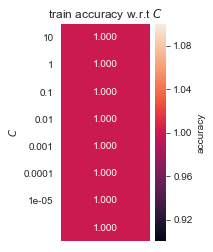

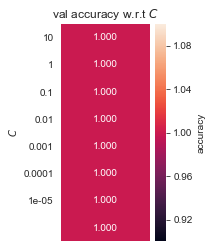

In [4]:
import import_ipynb
import Methods as m
train_acc = np.matrix(results.get("mean_train_score")).T
m.draw_heatmap_linear(train_acc, 'train accuracy', [10, 1, 0.1, 0.01, .001, .0001, .00001])
val_acc = np.matrix(results.get("mean_test_score")).T
m.draw_heatmap_linear(val_acc, 'val accuracy', [10, 1, 0.1, 0.01, .001, .0001, .00001])

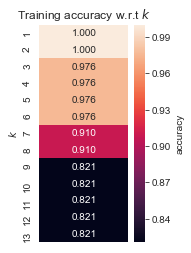

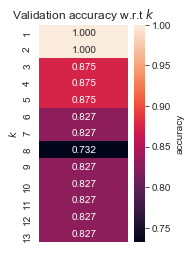

In [14]:
xTrain = np.array(xTrain)
yTrain = np.array(yTrain)
k_list = [1,2,3,4,5,6,7,8,9,10,11,12,13]
val_acc_array, train_acc_array = m.simple_GridSearchCV_fit(xTrain, yTrain, k_list, 3)
m.draw_heatmap_knn(train_acc_array.reshape(-1,1), 'Training accuracy', k_list)
m.draw_heatmap_knn(val_acc_array.reshape(-1,1), 'Validation accuracy', k_list)